# Symbolic Calculation Project
 This notebook demonstrates the training of LSTM and Transformer model to learn the generated expansion of functions using Sympy


In [1]:
# Mounting colab to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls

drive  sample_data


In [3]:
%cd drive/MyDrive/Sympy

/content/drive/MyDrive/Sympy


In [4]:
!ls

dataset.py  model.py  __pycache__  train.py  utils.py


Importing Data class from dataset

In [5]:
from dataset import Data
from sympy import *

In [6]:
# Creating dataset for several functions upto 4th order of their expansion
# Class is written in dataset.py
order = 4
x = symbols('x')
types=[sin(x), cos(x), tan(x), log(1+x), exp(sin(x)), exp(tan(x)), cot(x), csc(x), sinc(x), asin(x), 
       acos(x), atan(x), acot(x), exp(x), exp(-x), exp(x**2), exp(2*x), sec(x), sqrt(1+x), sinh(x),
       cosh(x), tanh(x), sech(x), asinh(x), atanh(x), 1/(1+x), 1/(1+x)**2, 1/(1-x), -ln(1-x), 
       1/(1+x**2), exp(x)*(1+x), exp(x)*(1-x), 1/(1+x)**2, 1/(1-x)**2, 1/(1-x)**3, 1/(1-x**2), log(3+4*x)]

In [7]:
# Data
data = Data(order, types)
df = data.generate()
df.head()

,function,expansion
0,sqrt(x + 1),-5*x**4/128 + x**3/16 - x**2/8 + x/2 + 1
1,(1 - x)**(-3),15*x**4 + 10*x**3 + 6*x**2 + 3*x + 1
2,exp(sin(x)),-x**4/8 + x**2/2 + x + 1
3,atan(x),-x**3/3 + x
4,exp(2*x),2*x**4/3 + 4*x**3/3 + 2*x**2 + 2*x + 1


In [8]:
# Tokenize the dataset
df_token = data.tokenize(df)

In [9]:
vocab_to_int, int_to_vocab = data.get_tokens_dict()

Importing dataset and predict class from utils.py

In [10]:
from utils import TrainDataset, TestDataset, Predict

In [11]:
data = TrainDataset(df_token)

Training the model

In [12]:
# Hyperparameter
epoch = 15000
batch_size = 1
input_size = 1
hidden_size = 64
num_layers = 2
output_size = len(vocab_to_int) + 1
model_type = "LSTM" # Change it to "Transformer" to train the transformer model

# Triaining the model
from train import Train
from torch.utils.data import DataLoader
train_obj = Train(epoch, batch_size, input_size, hidden_size, 
                  num_layers, output_size)
train_loader = DataLoader(data, batch_size=batch_size, shuffle=True)
losses = train_obj.run(train_loader, model_type)

Epoch 1 - Loss: 4.2486
Epoch 1000 - Loss: 0.3835
Epoch 2000 - Loss: 0.1567
Epoch 3000 - Loss: 0.9515
Epoch 4000 - Loss: 0.0399
Epoch 5000 - Loss: 0.4747
Epoch 6000 - Loss: 0.0186
Epoch 7000 - Loss: 0.0228
Epoch 8000 - Loss: 0.0141
Epoch 9000 - Loss: 0.0153
Epoch 10000 - Loss: 0.0102
Epoch 11000 - Loss: 0.3599
Epoch 12000 - Loss: 0.0126
Epoch 13000 - Loss: 0.0073
Epoch 14000 - Loss: 0.0124
Epoch 15000 - Loss: 0.0067


Text(0.5, 1.0, 'Loss vs Epoch Curve')

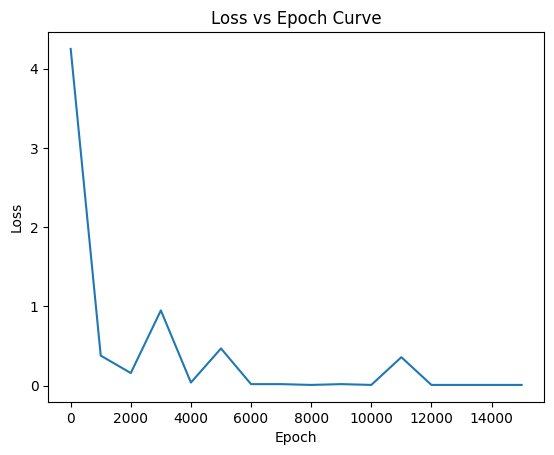

In [13]:
import matplotlib.pyplot as plt
epoch_list = []
for i in range(epoch):
  if (i+1)%1000 == 0 or i == 0:
    epoch_list.append(i+1)

plt.plot(epoch_list, losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title("Loss vs Epoch Curve")

In [14]:
# Prediction for function sqrt(x + 1)
example = "sin(x)"
model = train_obj.get_model()
pred_obj = Predict(example, model, vocab_to_int, int_to_vocab)
ans = pred_obj.predict()
ans

'-x**3/6 + x'

In [15]:
# Prediction for function (1 - x)**(-3)
ex_2 = "(1 - x)**(-3)"
pred_obj_2 = Predict(ex_2, model, vocab_to_int, int_to_vocab)
ans_2 = pred_obj_2.predict()
ans_2

'15*x**4 + 10*x**3 + 6*x**2 + 3*x + 1'